In [1]:
def downloadDriveFile(file_id,file_name,file_extension):
  '''
  Allows charge of public files into colab's workspace
  '''
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$file_id -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$file_id -O "$file_name"."$file_extension" && rm -rf /tmp/cookies.txt

if 'google.colab' in str(get_ipython()):
    downloadDriveFile('1HpazHI56LLIKJGcdg-rj-8QWgnXu8SBe','optimize','py')

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

import optimize

Steepest Descent Method
=========

Example 1
----
Find the minimizer of $f(\mathbf{x}) = x_1^{e−(x_1^2 + x_2^2)}$.

In [23]:
x = sp.symbols('x1 x2')
func = x[0]*sp.exp(-x[0]**2 - x[1]**2)
x0 = [-1, 1]

min, search_steps = optimize.steepest_descent(func, x, start=x0, full_output=True)
min_fix, search_steps_fix = optimize.steepest_descent(func, x, start=x0, step_type='fix', step=0.25, full_output=True)

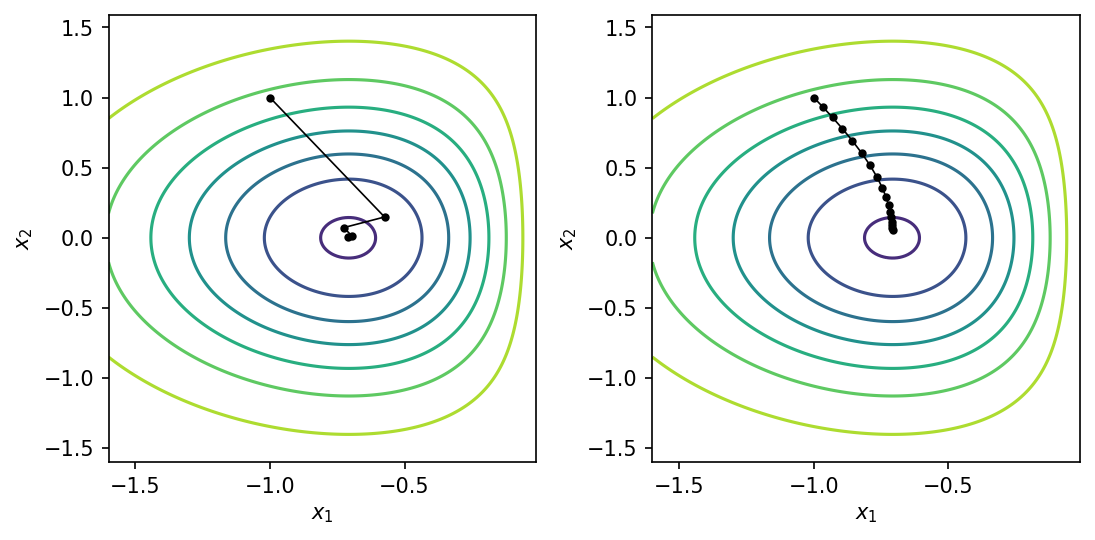

In [24]:
fig = plt.figure()

step = 0.01
x_vals = np.arange(-1.6, 0, step)
y_vals = np.arange(-1.6, 1.6, step)
X, Y = np.meshgrid(x_vals, y_vals)

function = sp.lambdify([*x], func, modules='numpy')
func_eval = function(X,Y)

ax1 = fig.add_subplot(1,2,1)
ax1.contour(X, Y, func_eval)
ax1.plot(search_steps[:, 0],search_steps[:, 1],'-k.', linewidth='0.8', markersize=6)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')

ax2 = fig.add_subplot(1,2,2)
ax2.contour(X, Y, func_eval)
ax2.plot(search_steps_fix[:, 0],search_steps_fix[:, 1],'-k.', linewidth='0.8' , markersize=6)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')

fig_dpi = 150
fig_width = 18.8/2.54
fig_height = 9.4/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))
fig.tight_layout()

plt.show()

Example 2
----
Find the minimizer of $f(\mathbf{x}) = 0.06e^{(2x_1+x_2)} + 0.05e^{(x_1-2x_2)} + e^{-x_1}$.

In [2]:
x = sp.symbols('x1 x2')
func = 0.06*sp.exp(2*x[0]+x[1]) + 0.05*sp.exp(x[0]-2*x[1]) + sp.exp(-x[0])
x0 = [-0.5, 2]

min, search_steps = optimize.steepest_descent(func, x, start=x0, full_output=True)
min_fix, search_steps_fix = optimize.steepest_descent(func, x, start=x0, step_type='fix', step=0.25, full_output=True)

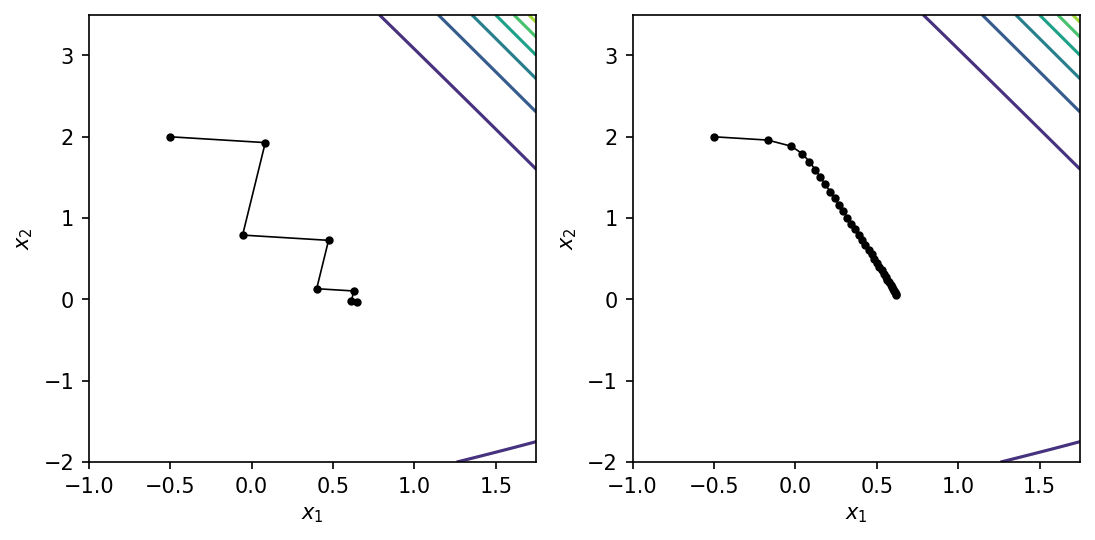

In [5]:
fig = plt.figure()

step = 0.001
x_vals = np.arange(-1, 1.75, step)
y_vals = np.arange(-2, 3.5, step)
X, Y = np.meshgrid(x_vals, y_vals)

function = sp.lambdify([*x], func, modules='numpy')
func_eval = function(X,Y)

ax1 = fig.add_subplot(1,2,1)
ax1.contour(X, Y, func_eval)
ax1.plot(search_steps[:, 0],search_steps[:, 1],'-k.', linewidth='0.8', markersize=6)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')

ax2 = fig.add_subplot(1,2,2)
ax2.contour(X, Y, func_eval)
ax2.plot(search_steps_fix[:, 0],search_steps_fix[:, 1],'-k.', linewidth='0.8' , markersize=6)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')

fig_dpi = 150
fig_width = 18.8/2.54
fig_height = 9.4/2.54

fig.dpi=fig_dpi
fig.set_size_inches((fig_width,fig_height))
fig.tight_layout()

plt.show()